In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from helpr.physics.api import CrackEvolutionAnalysis
from helpr.utilities.unit_conversion import convert_psi_to_mpa, convert_in_to_m
from helpr.utilities.plots import plot_cycle_life_cdfs, plot_cycle_life_pdfs, plot_cycle_life_criteria_scatter, plot_cycle_life_cdf_ci
from probabilistic.capabilities.uncertainty_definitions import UniformDistribution, NormalDistribution, DeterministicCharacterization

## **Probabilistic Evaluation for Pipe Population's Lifetimes with Multiple Types of Uncertainty**

####  **Problem Specification**

- **Geometry**

In [3]:
outer_diameter = NormalDistribution(name='outer_diameter',
                                    uncertainty_type='epistemic',
                                    nominal_value=convert_in_to_m(36),
                                    mean=convert_in_to_m(36),
                                    std_deviation=convert_in_to_m(0.005))  # pipe outer diameter, m
wall_thickness = NormalDistribution(name='wall_thickness',
                                    uncertainty_type='epistemic',
                                    nominal_value=convert_in_to_m(0.406),
                                    mean=convert_in_to_m(0.406),
                                    std_deviation=convert_in_to_m(0.005))  # pipe wall thickness, m

- **Material Properties**

In [4]:
yield_strength = DeterministicCharacterization(name='yield_strength',
                                               value=convert_psi_to_mpa(52_000))  # material yield strength, psi
fracture_resistance = DeterministicCharacterization(name='fracture_resistance',
                                                    value=55)  # fracture resistance (toughness), MPa m1/2

- **Operating Conditions**

In [5]:
max_pressure = NormalDistribution(name='max_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(850),
                                  mean=convert_psi_to_mpa(850),
                                  std_deviation=convert_psi_to_mpa(20))  # maximum pressure during oscillation, MPa
min_pressure = NormalDistribution(name='min_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(638),
                                  mean=convert_psi_to_mpa(638),
                                  std_deviation=convert_psi_to_mpa(20))  # minimum pressure during oscillation, MPa
temperature = UniformDistribution(name='temperature',
                                  uncertainty_type='aleatory',
                                  nominal_value=293,
                                  upper_bound=300,
                                  lower_bound=285)  # gas blend temperature variation, K 
volume_fraction_h2 = UniformDistribution(name='volume_fraction_h2',
                                         uncertainty_type='aleatory',
                                         nominal_value=0.1,
                                         upper_bound=0.2,
                                         lower_bound=0)  # % volume fraction H2 in natural gas blend, fraction

- **Initial Crack Dimensions**

In [6]:
flaw_depth = UniformDistribution(name='flaw_depth',
                                uncertainty_type='aleatory',
                                nominal_value=25,
                                upper_bound=30,
                                lower_bound=20)  # population of flaw % through pipe thickness, %
flaw_length = DeterministicCharacterization(name='flaw_length',
                                            value=0.04)  # length of initial crack/flaw, m

- **Quantities of Interest** *(QoI)*

In [7]:
plotted_variable = 'Cycles to a(crit)'             

- **Probabilistic Settings**

In [8]:
sample_type = 'lhs'
aleatory_sample_size = 1000
epistemic_sample_size = 10

#### **Analysis**
- **Using LHS sampling of uncertain variables**
- **Using double loop of epistemic and aleatory variables**

In [9]:
analysis = CrackEvolutionAnalysis(outer_diameter=outer_diameter,
                                  wall_thickness=wall_thickness,
                                  flaw_depth=flaw_depth,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  aleatory_samples=aleatory_sample_size,
                                  epistemic_samples=epistemic_sample_size,
                                  sample_type=sample_type,
                                  random_seed=4321)
analysis.perform_study()

#### **Postprocessing**

/Users/bbschro/Library/CloudStorage/OneDrive-SandiaNationalLaboratories/FRET/Projects/HyBlend/helpr/src/helpr/utilities/plots.py:258: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


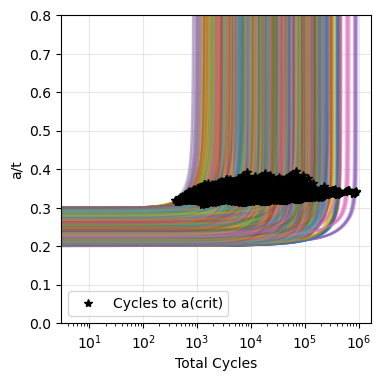

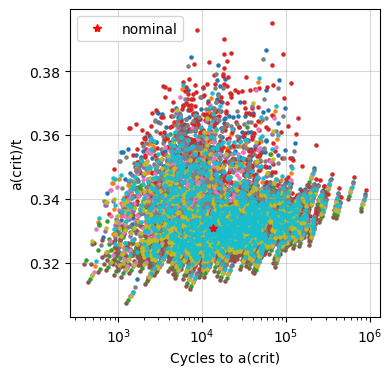

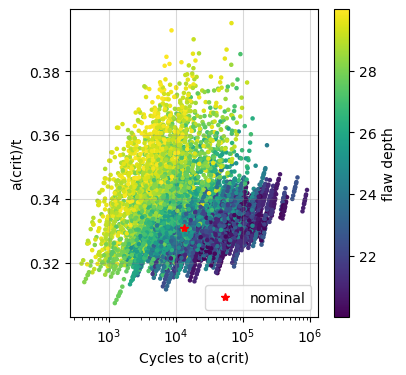

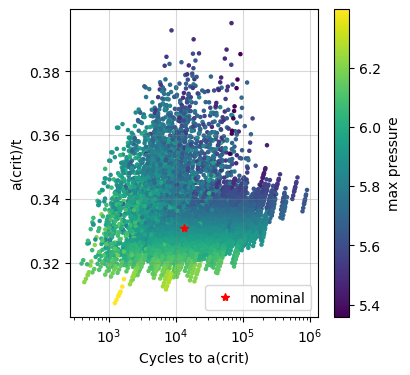

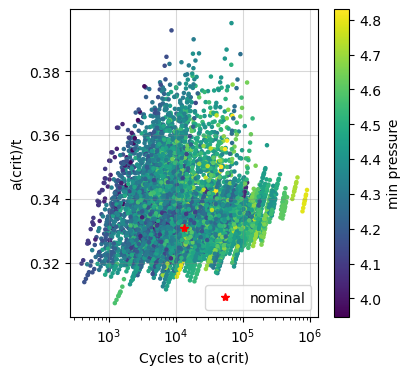

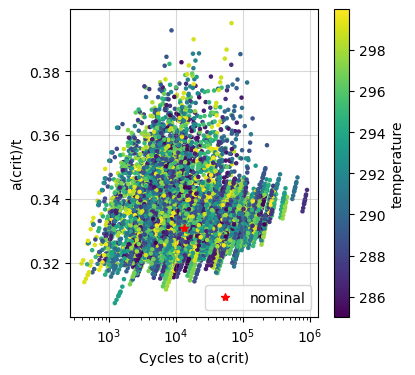

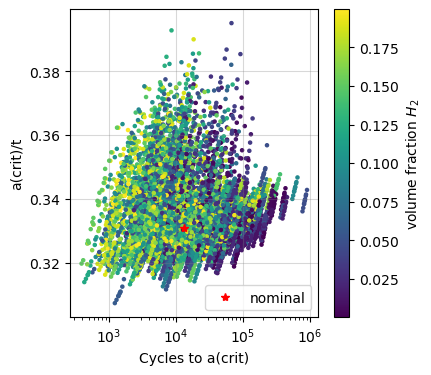

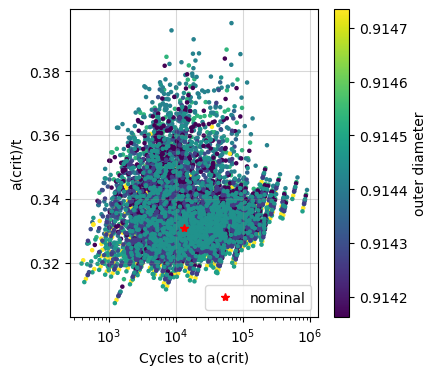

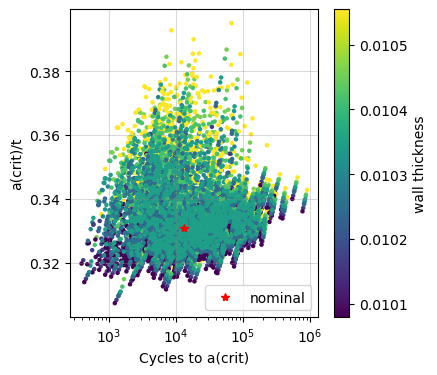

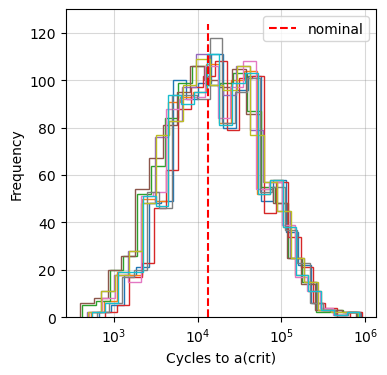

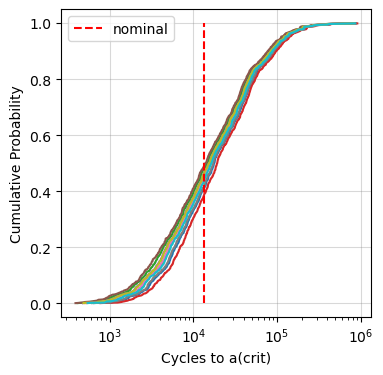

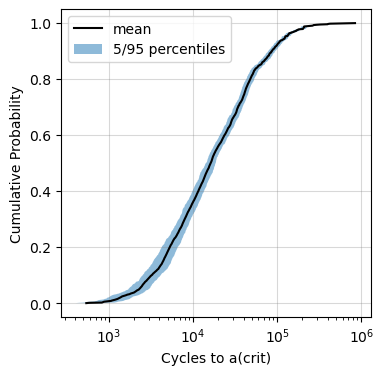

In [10]:
analysis.generate_probabilistic_results_plots(plotted_variable)
plot_cycle_life_cdf_ci(analysis, criteria=plotted_variable)

In [11]:
analysis.save_results()

'Results/date_31_10_2023_time_17_35/'